In [3]:
import importlib

def import_and_reload(module):
    importlib.reload(module)
    globals().update(vars(module))

import ashmcmc_SPICE
import_and_reload(ashmcmc_SPICE)


In [4]:
import glob

filedir = '/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/'
# List all the files in the directory
files = sorted(glob.glob(f'{filedir}/*int*'))

output_dir = Path(files[0]).parent

dataset, output_dir = prep_spice_data(files)  # get all intensity data and density data into xarray format


/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00702.70-o_3-int_con-06_time-240115T162345.fits
/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00703.87-o_3-int_con-06_time-240115T162345.fits
/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00706.02-mg_9-int_con-06_time-240115T162345.fits
/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00748.40-s_4-int_con-06_time-240115T162345.fits
/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00749.54-mg_9-int_con-06_time-240115T162345.fits
/Users/andysh

In [252]:
a = dataset.data.values[:,:, 0]*u.W/(u.m**2)/u.sr/u.nm 

In [251]:
unit_spec_rad_erg = u.erg/(u.cm**2*u.s*u.sr*u.AA)

In [253]:
a_new = a.to(unit_spec_rad_erg)

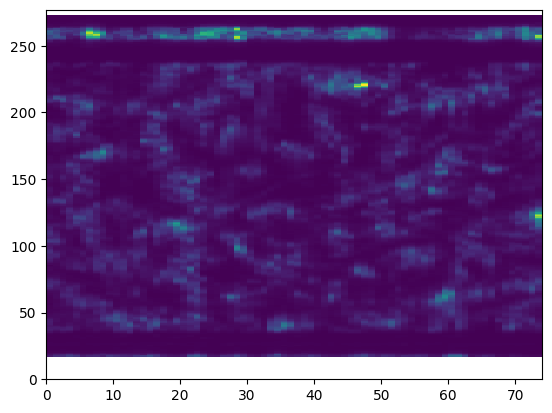

In [255]:
plt.pcolormesh(a_new.value)

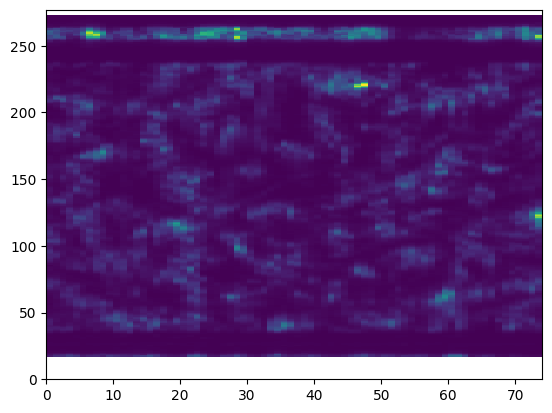

In [256]:
plt.pcolormesh(a.value)

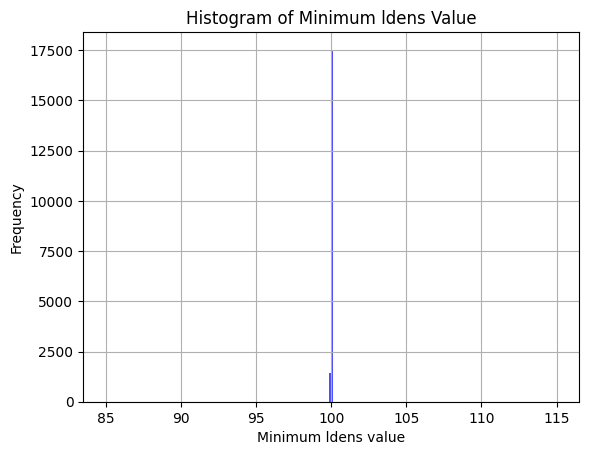

In [262]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dataset is your dataset containing ldens
min_ldens = dataset.ldens.values

plt.hist(a_new.value.ravel()/a.value.flatten(), bins=200, alpha=0.7, color='blue',range=(85,115))
plt.xlabel('Minimum ldens value')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum ldens Value')
plt.grid(True)
plt.show()


In [160]:
import matplotlib.pyplot as plt

In [161]:
import sunpy.map

In [162]:
file = '/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00706.02-mg_9-int_con-06_time-240115T162345.fits'

In [167]:
high_t = readsav('/Users/andysh.to/Script/idl_code/density_ratios_mg_9_706_02_749_54_.sav')
low_t = readsav('density_ratios_mg_9_706_02_749_54_.sav')

In [168]:
high_t

{'den': array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
        12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
        14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
        16.75, 17.  ], dtype='>f4'),
 'rat': array([6.05624082e+00, 6.05336194e+00, 6.04959797e+00, 6.04367825e+00,
        6.03360865e+00, 6.01602488e+00, 5.98514143e+00, 5.93107120e+00,
        5.83733159e+00, 5.67776798e+00, 5.41455349e+00, 5.00211188e+00,
        4.40519929e+00, 3.63365289e+00, 2.76999723e+00, 1.94594770e+00,
        1.27119218e+00, 7.84545641e-01, 4.64802134e-01, 2.67432612e-01,
        1.50332842e-01, 8.26011849e-02, 4.41719067e-02, 2.28265230e-02,
        1.13396015e-02, 5.44277194e-03, 2.58550258e-03, 1.26989328e-03,
        6.77884843e-04], dtype='>f8'),
 'smooth_den': array([10.      , 10.001   , 10.002   , ..., 16.998001, 16.999   ,
        17.      ], dtype='>f4'),
 'smooth_rat': array([6.05624082e+00, 6.05622985e+00, 6.05621888e+00, ...,
  

In [169]:
low_t

{'den': array([10.  , 10.25, 10.5 , 10.75, 11.  , 11.25, 11.5 , 11.75, 12.  ,
        12.25, 12.5 , 12.75, 13.  , 13.25, 13.5 , 13.75, 14.  , 14.25,
        14.5 , 14.75, 15.  , 15.25, 15.5 , 15.75, 16.  , 16.25, 16.5 ,
        16.75, 17.  ], dtype='>f4'),
 'rat': array([6.05624082e+00, 6.05336194e+00, 6.04959797e+00, 6.04367825e+00,
        6.03360865e+00, 6.01602488e+00, 5.98514143e+00, 5.93107120e+00,
        5.83733159e+00, 5.67776798e+00, 5.41455349e+00, 5.00211188e+00,
        4.40519929e+00, 3.63365289e+00, 2.76999723e+00, 1.94594770e+00,
        1.27119218e+00, 7.84545641e-01, 4.64802134e-01, 2.67432612e-01,
        1.50332842e-01, 8.26011849e-02, 4.41719067e-02, 2.28265230e-02,
        1.13396015e-02, 5.44277194e-03, 2.58550258e-03, 1.26989328e-03,
        6.77884843e-04], dtype='>f8'),
 'smooth_den': array([10.      , 10.001   , 10.002   , ..., 16.998001, 16.999   ,
        17.      ], dtype='>f4'),
 'smooth_rat': array([6.05624082e+00, 6.05622985e+00, 6.05621888e+00, ...,
  

In [226]:
np.nanmin(dataset.ldens)

10.0

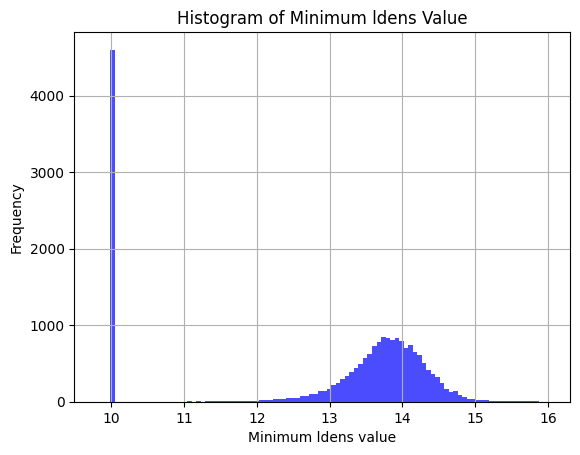

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming dataset is your dataset containing ldens
min_ldens = dataset.ldens.values

plt.hist(min_ldens.flatten(), bins=100, alpha=0.7, color='blue',range=(9.8, 16))
plt.xlabel('Minimum ldens value')
plt.ylabel('Frequency')
plt.title('Histogram of Minimum ldens Value')
plt.grid(True)
plt.show()


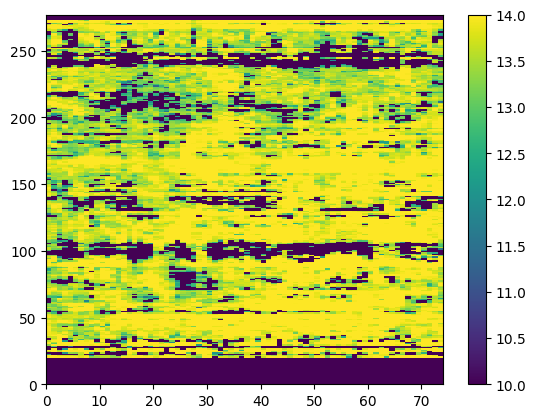

In [230]:
# Assuming you have already loaded the SunPy map data into the 'file' variable

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the SunPy map data using pcolormesh
im = ax.pcolormesh(dataset.ldens, vmin=10,vmax=14)

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax)

# Show the plot
plt.show()

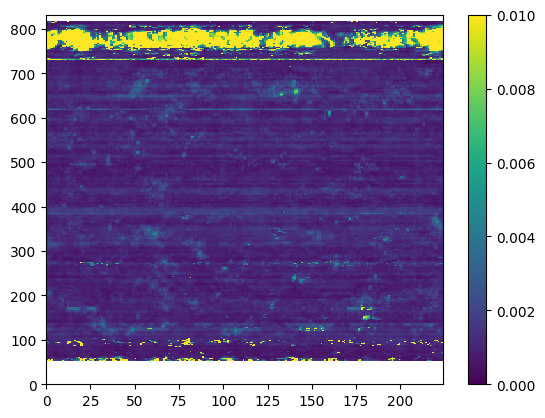

In [80]:
# Assuming you have already loaded the SunPy map data into the 'file' variable

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the SunPy map data using pcolormesh
im = ax.pcolormesh(sunpy.map.Map(file)[1].data, vmin=0,vmax=0.01)

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax)

# Show the plot
plt.show()

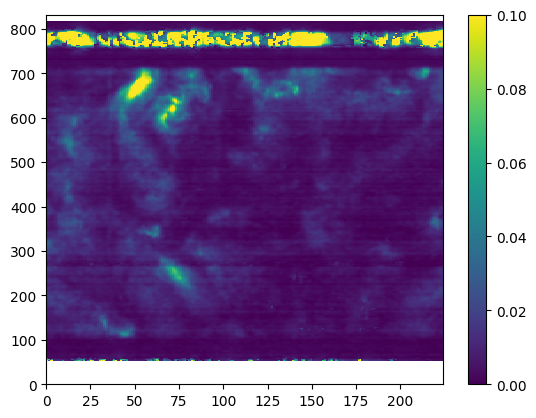

In [345]:
# Assuming you have already loaded the SunPy map data into the 'file' variable

# Create a new figure and axis
fig, ax = plt.subplots()

# Plot the SunPy map data using pcolormesh
im = ax.pcolormesh(sunpy.map.Map(file)[0].data, vmin=0,vmax=0.1)

# Add a colorbar to the plot
cbar = plt.colorbar(im, ax=ax)

# Show the plot
plt.show()

In [202]:
10000000

10000000

In [16]:
import re


In [23]:
xpix=20
ypix=140

In [24]:
files = sorted(glob.glob('/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/*int*'))
for file in files:
    int = sunpy.map.Map(file)[0].data[ypix, xpix] - sunpy.map.Map(file)[1].data[ypix, xpix] # unit - W m^−2 sr^−1 nm^−1
    int_only = sunpy.map.Map(file)[0].data[ypix, xpix]
    diff = abs((int-int_only)/int_only)
    print(file.split('/')[-1])
    print('int = ',np.nanmedian(int*1e3))
    print('int only = ',np.nanmedian(int_only*1e3))
    print(diff)
    wid = sunpy.map.Map(file.replace('int','wid'))[0].data # unit - angstrom
    wvl = float(re.search(r'_00(\d+\.\d+)', file).group(1)) # # unit - angstrom
    converted_int = int*1e4
    # praint(wvl)

solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00702.70-o_3-int_con-06_time-240115T162345.fits
int =  33.36032721270565
int only =  34.37066965626475
0.02939548323216764
solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00703.87-o_3-int_con-06_time-240115T162345.fits
int =  42.4724174382549
int only =  44.407656290113486
0.04357894591904924
solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00706.02-mg_9-int_con-06_time-240115T162345.fits
int =  11.443368051537878
int only =  12.167435066439305
0.05950859905540629
solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00748.40-s_4-int_con-06_time-240115T162345.fits
int =  3.180121970326677
int only =  4.342742648840074
0.2677157668608174
solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00749.54-mg_9-int_con-06_time-240115T162345.fits
int =  -13.549686304368906
int only =  5.055607052752959
3.680130430032259
solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00750.22-s_4-int_con-06_time-240115T162345.fit

In [213]:
1e7/10000*10

10000.0

In [216]:
1e4

10000.0

In [205]:
np.nanmedian(converted_int)

31.40649839047952

In [164]:
int_map = spectral_radiance_to_intensity(int, wvl, wid)

In [165]:
np.nanmedian(int)

0.0059875733387046515

In [166]:
np.nanmedian(int_map)

2.561216306003928e-05

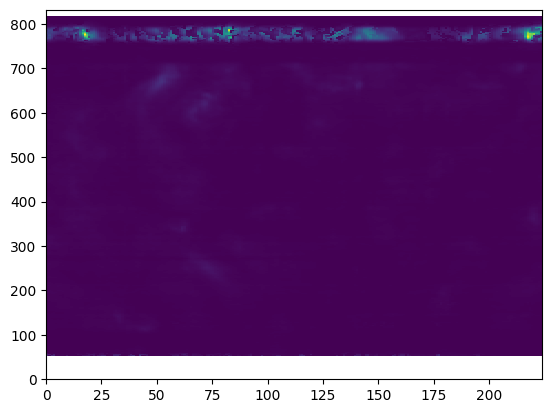

In [169]:
plt.pcolormesh(int_map)

In [167]:
spice_data = sunpy.map.Map('/Users/andysh.to/Script/Python_Script/spice/data_storage2/composition_mosaic/20230329T031532/solo_L2.5_spice-n-ras_20230329T031532_V02_184549516-000_00706.02-mg_9-int_con-06_time-240115T162345.fits')[0].data

In [348]:
for i in range(5):
    if i == 2:
        continue
    else:
        print(i)

0
1
3
4


In [172]:
xpix=60
ypix=70

In [173]:
print(dataset.data[ypix, xpix, 2].values)
print(dataset.data[ypix, xpix, 4].values)
print((dataset['ldens'][ypix, xpix].values))


0.007865595017787054
0.004495591725547242
13.816


In [174]:
logt, emis_photo, linenames = read_emissivity_spice(dataset['ldens'][ypix, xpix].values, abund_file='spice_emissivities_sun_photospheric_2015_scott')
logt, emis_coro_mg, linenames = read_emissivity_spice(dataset['ldens'][ypix, xpix].values, abund_file='spice_emissivities_spice_sun_coronal_2015_scott_mg')


In [175]:
def interp_emis_temp(original_array):
    # Interpolate into array with size 401
    new_size = 70
    new_indices = np.linspace(0, len(original_array) - 1, new_size)
    interpolated_array = np.interp(new_indices, np.arange(len(original_array)), original_array)
    return interpolated_array

In [177]:
def emissionLine_setup(ind, emis, dataset, xpix, ypix, line, logt_interp):
    mcmc_emis = ContFuncDiscrete(logt_interp*u.K, interp_emis_temp(emis[ind, :]) * u.cm**5 / u.K,
                                 name=line)
    mcmc_intensity = dataset.data[ypix, xpix, ind].values*1e3
    mcmc_int_error = 0.3 * mcmc_intensity
    emissionLine = EmissionLine(
        mcmc_emis,
        intensity_obs=mcmc_intensity,
        sigma_intensity_obs=mcmc_int_error,
        name=line
    )
    return emissionLine


In [190]:
np.zeros(temp_bins.bin_centers.shape)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [182]:
_dem_median.shape

(69,)

In [178]:
emis_photo = emis_filter(emis_photo, linenames, dataset.linenames)
emis_coro_mg = emis_filter(emis_coro_mg, linenames, dataset.linenames)

logt_interp = interp_emis_temp(logt.value)
chi2_all_photo = []
all_unpred_photo = []
chi2_all_coro = []
all_unpred_coro = []

for i in range(5):
    for emis_num, emis in enumerate([emis_photo, emis_coro_mg]):

        ycoords_out = []
        dem_results = []
        chi2_results = []
        linenames_list = []
        comp_result = []
        mcmc_lines = []
        temp_bins = TempBins(logt_interp * u.K)
        chi2 = np.inf
        binary_comp = -1
        dem_result = None
        n_lines_unpredicted = 0
    
        for ind, line in enumerate(dataset.linenames.values):
            if chi2 == np.inf:
                linenames_list.append(line)  # Append the list of MCMC lines to the list
    
            if dataset.data[ypix, xpix, ind]*1e3 > 1 and ~np.all(emis[ind, :] == 0):
                # mcmc_emis = ContFuncDiscrete(logt_interp*u.K, interp_emis_temp(emis[ind, :]) * u.cm**5 / u.K,
                #                              name=line)
                # mcmc_intensity = dataset.data[ypix, xpix, ind].values*1e3
                # mcmc_int_error = 0.25 * mcmc_intensity
                # emissionLine = EmissionLine(
                #     mcmc_emis,
                #     intensity_obs=mcmc_intensity,
                #     sigma_intensity_obs=mcmc_int_error,
                #     name=line
                # )
                emissionLine = emissionLine_setup(ind, emis, dataset, xpix, ypix, line, logt_interp)
                mcmc_lines.append(emissionLine)
    
        # Perform MCMC process for the given MCMC lines and temperature bins
        dem_result = predict_dem_emcee(mcmc_lines, temp_bins, nwalkers=200, nsteps=300, progress=True, dem_guess=None)
        dem_init = np.median([sample.values.value for num, sample in enumerate(dem_result.iter_binned_dems())], axis=0)
        dem_result = predict_dem_emcee(mcmc_lines, temp_bins, nwalkers=200, nsteps=300, progress=True,
                                        dem_guess=dem_init)
        _dem_median = np.median([sample.values.value for num, sample in enumerate(dem_result.iter_binned_dems())],
                                axis=0)
        dem_result = predict_dem_emcee(mcmc_lines, temp_bins, nwalkers=200, nsteps=1000, progress=True,
                                        dem_guess=_dem_median)
        _dem_median = np.median([sample.values.value for num, sample in enumerate(dem_result.iter_binned_dems())],
                                axis=0)
        for num,j in enumerate(mcmc_lines):
            percentage_diff = np.abs((mcmc_lines[num]._I_pred(temp_bins, _dem_median)-mcmc_lines[num].intensity_obs)/mcmc_lines[num].intensity_obs*100)
            if percentage_diff > 25:
                n_lines_unpredicted+=1
        if emis_num == 0:
            all_unpred_photo.append(n_lines_unpredicted)
            chi2 = calc_chi2(mcmc_lines, _dem_median, temp_bins)
            chi2_all_photo.append(chi2)
        if emis_num == 1:
            all_unpred_coro.append(n_lines_unpredicted)
            chi2 = calc_chi2(mcmc_lines, _dem_median, temp_bins)
            chi2_all_coro.append(chi2)
        # if calc_chi2(mcmc_lines, _dem_median, temp_bins) < chi2*0.8:  # If the chi2 value is greater than the current chi2 value * 0.8
        #     chi2 = calc_chi2(mcmc_lines, _dem_median, temp_bins)  # Update the chi2 value
        #     dem_median = _dem_median
        #     binary_comp += 1  # Update the binary composition value to photospheric or coronal


100%|█████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 241.70it/s]


In [179]:
print(chi2_all_photo)
print(np.mean(chi2_all_photo))
print(all_unpred_photo)

[3.488964763319357, 3.5104943448767525, 3.3786378284464513, 3.433500153030922, 3.705349189421376]
3.503389255818971
[1, 2, 1, 2, 2]


In [180]:
print(chi2_all_coro)
print(np.mean(chi2_all_coro))
print(all_unpred_coro)

[3.1620674880689488, 3.1213098178860514, 3.2808113183663123, 3.1336976517262274, 3.1528795644649628]
3.170153168102501
[2, 1, 2, 2, 2]


In [ ]:
[10.9869220435644, 10.27226555938921, 10.56052413567871, 9.306574053266337, 11.567750803243637]
[4, 5, 4, 4, 6]


In [459]:

from matplotlib.axes import Axes
from typing import Any, Iterator, Optional, Tuple

def plot_final_samples(self, ax: Axes, **kwargs: Any) -> None:
    """
    Plot the final samples of the MCMC walker.

    Parameters
    ----------
    ax : matplotlib.axes.Axes
        Axes to plot the samples on.
    **kwargs : dict
        Keyword arguments are passed to :meth:`~matplotlib.axes.Axes.stairs`.
    """
    kwargs.setdefault("color", "k")
    kwargs.setdefault("alpha", 0.1)
    kwargs.setdefault("linewidth", 1)
    for i in range(self.samples.shape[0]):
        ax.stairs(self.samples[i, :].value, self.temp_bins.edges.value, **kwargs)


In [460]:
dem_result.samples

<Quantity [[6.76500017e+22, 4.54854478e+23, 5.30283275e+23, ...,
            6.04087029e+22, 3.33770891e+22, 4.97398605e+21],
           [9.73163866e+22, 1.85341937e+24, 3.51305350e+23, ...,
            6.16411327e+22, 6.53712064e+22, 1.08017603e+22],
           [1.48613770e+23, 1.20024683e+24, 5.42580475e+23, ...,
            8.09907408e+22, 4.92585453e+22, 8.70143213e+21],
           ...,
           [6.42859860e+22, 6.99598221e+23, 4.99175479e+23, ...,
            4.69545125e+22, 7.53615004e+22, 1.56394199e+22],
           [3.03019670e+23, 1.12602816e+24, 2.70495486e+23, ...,
            8.15228424e+22, 5.70364106e+22, 5.16466957e+21],
           [5.82518330e+22, 4.76384185e+23, 5.10578108e+23, ...,
            5.11766691e+22, 6.62427527e+22, 1.03003850e+22]] 1 / cm5>

In [464]:
mcmc_lines[0].temp_bins

AttributeError: 'EmissionLine' object has no attribute 'temp_bins'

In [480]:
def plot_emission_loci(lines, ax: Axes, **kwargs: Any) -> None:
    """
    Plot emission loci for a set of observed emission lines.

    Parameters
    ----------
    lines : list[EmissionLine]
        Lines to plot.
    ax : matplotlib.axes.Axes
        Axes to plot on.
    **kwargs : dict
        Keyword arguments are passed to :meth:`~matplotlib.axes.Axes.stairs`.

    Notes
    -----
    Currently only works with lines that have a `ContFuncDiscrete`
    contribution function.
    """
    kwargs.setdefault("color", "k")

    # Plot emission loci
    for line in lines:
        if not isinstance(line.cont_func, ContFuncDiscrete):
            continue

        tbins = TempBins(line.cont_func.temps)
        cont_func = line.cont_func.binned(tbins)

        with np.errstate(over="ignore", divide="ignore"):
            locus = line.intensity_obs / cont_func / tbins.bin_widths

        # Convert temperature values to dimensionless quantities
        tbins_edges_value = tbins.edges.to_value(u.K)

        ax.stairs(locus.value, tbins_edges_value, **kwargs)

Text(0.5, 1.0, 'Emission loci (blue) and DEM estimates (black)')

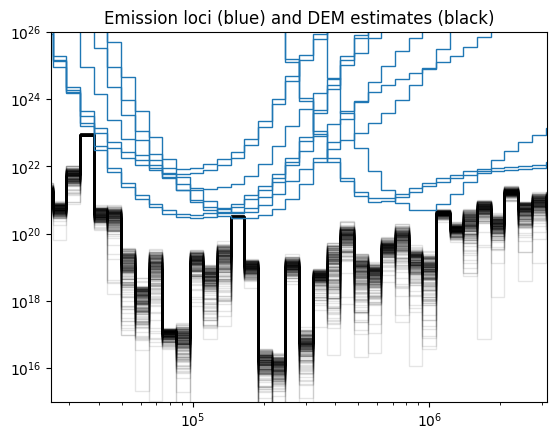

In [485]:
fig, ax = plt.subplots()

plot_final_samples(dem_result, ax)

plot_emission_loci(mcmc_lines, ax, color="tab:blue")

ax.set_xscale("log")
ax.set_yscale("log")

ax.set_xlim(10**(4.4), 10**(6.5))
ax.set_ylim((1e15 * u.cm**-5).to_value(u.cm**-5), (1e26 * u.cm**-5).to_value(u.cm**-5))

ax.set_title("Emission loci (blue) and DEM estimates (black)")

In [499]:
dem_median = _dem_median
lines = mcmc_lines
print("Overall chi2: ",chi2)
for num,i in enumerate(lines):
    print(f'--------------{num}:{lines[num].name}--------------')
    print(f'{lines[num].intensity_obs} (Observed)')
    print(f'{lines[num]._I_pred(temp_bins, dem_median)} (Predicted)')
    print('Percentage Difference: ',np.abs((lines[num]._I_pred(temp_bins, dem_median)-lines[num].intensity_obs)/lines[num].intensity_obs*100))
    
# chi2 = 0
# for num,i in enumerate(lines):
#     int_obs = i.intensity_obs
#     int_pred = i._I_pred(temp_bins, dem_median)
#     chi2_line = ((int_pred-int_obs)/(int_obs*0.25))**2
#     chi2 += chi2_line



Overall chi2:  26.68332201128896
--------------0:o_3_702.70--------------
3.2299697361732775 (Observed)
3.976687221667773 (Predicted)
Percentage Difference:  23.118405015743978
--------------1:o_3_703.87--------------
5.371285394206901 (Observed)
4.9998772515672 (Predicted)
Percentage Difference:  6.9146976073972315
--------------2:s_4_748.40--------------
3.807942929216495 (Observed)
0.27805875014787224 (Predicted)
Percentage Difference:  92.69792758671716
--------------3:s_4_750.22--------------
3.151819935617808 (Observed)
0.7087794952135664 (Predicted)
Percentage Difference:  77.5120562185722
--------------4:n_4_765.15--------------
16.89672838592078 (Observed)
15.308412922302763 (Predicted)
Percentage Difference:  9.400136093455133
--------------5:ne_8_770.42--------------
40.49967670945554 (Observed)
42.5531113949245 (Predicted)
Percentage Difference:  5.070249573102241
--------------6:ne_8_780.34--------------
22.399028493300136 (Observed)
21.041765935850247 (Predicted)
Percenta

In [382]:
temp_bins.bin_centers.value

array([1.07200261e+04, 1.22524713e+04, 1.40021688e+04, 1.60036001e+04,
       1.82876486e+04, 2.09013748e+04, 2.38826474e+04, 2.72956562e+04,
       3.11866159e+04, 3.56429398e+04, 4.07313910e+04, 4.65494201e+04,
       5.32033793e+04, 6.07985224e+04, 6.94883907e+04, 7.94024289e+04,
       9.07501409e+04, 1.03689841e+05, 1.18506992e+05, 1.35402946e+05,
       1.54748497e+05, 1.76869734e+05, 2.02125331e+05, 2.31016268e+05,
       2.63984271e+05, 3.01712990e+05, 3.44744198e+05, 3.94009979e+05,
       4.50170662e+05, 5.14495689e+05, 5.87978813e+05, 6.71958346e+05,
       7.68008986e+05, 8.77637857e+05, 1.00307575e+06, 1.14617424e+06,
       1.30997603e+06, 1.49674401e+06, 1.71062360e+06, 1.95462027e+06,
       2.23386183e+06, 2.55318820e+06, 2.91773386e+06, 3.33477457e+06,
       3.81063400e+06, 4.35524305e+06, 4.97635031e+06, 5.68748925e+06,
       6.49809082e+06, 7.42658847e+06, 8.48776026e+06, 9.69994367e+06,
       1.10864466e+07, 1.26688402e+07, 1.44795292e+07, 1.65449981e+07,
      

AttributeError: 'EmissionLine' object has no attribute 'temp_bins'

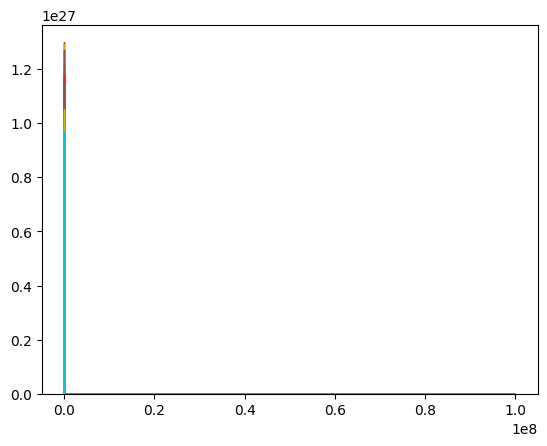

In [379]:
def plot_emission_loci(lines, ax, **kwargs):
    for line in lines:
        tbins = line.temp_bins
        cont_func = line.cont_func(tbins.centers)
        with np.errstate(over="ignore", divide="ignore"):
            locus = line.intensity_obs / cont_func / tbins.bin_widths
        ax.stairs(locus.value, tbins.edges.to_value(tbins.edges.unit), **kwargs)

fig, ax = plt.subplots()

# Convert temperature bin edges to dimensionless values
temp_bin_edges = temp_bins.edges.to_value(u.K)

# Convert DEM samples to dimensionless values
dem_samples = dem_result.samples.to_value(dem_result.samples.unit)

# Plot the DEM samples
for i in range(dem_samples.shape[0]):
    ax.stairs(dem_samples[i, :], temp_bin_edges, linewidth=1)

# Plot the emission loci using the modified function
plot_emission_loci(lines, ax, color="tab:blue")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(temp_bin_edges.min() * 0.9, temp_bin_edges.max() * 1.1)
ax.set_ylim(1e18, 1e30)

ax.set_title("Emission loci (blue) and DEM estimates (black)")

TypeError: only dimensionless scalar quantities can be converted to Python scalars

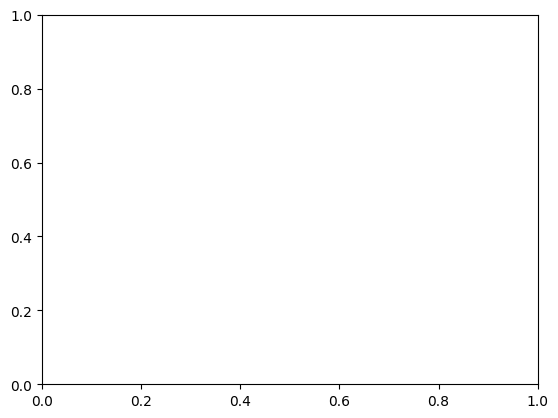

In [64]:
fig, ax = plt.subplots()

dem_result.plot_final_samples(ax)
plot_emission_loci(mcmc_lines, ax, color="tab:blue")

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim(temp_bins.min * 0.9, temp_bins.max * 1.1)
ax.set_ylim(1e18 * u.cm**-5, 1e30 * u.cm**-5)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title("Emission loci (blue) and DEM estimates (black)")
